In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd

!wget = https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/flights.csv
df_flights = pd.read_csv('flights.csv')
df_flights.head()

--2022-12-17 16:42:11--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2022-12-17 16:42:11--  https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/flights.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35862658 (34M) [text/plain]
Saving to: ‘flights.csv’

flights.csv         100%[===================>]  34.20M   167MB/s    in 0.2s    

2022-12-17 16:42:11 (167 MB/s) - ‘flights.csv’ saved [35862658/35862658]

FINISHED --2022-12-17 16:42:11--
Total wall clock time: 0.7s
Downloaded: 1 files, 34M in 0.2s (167 MB/s)


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [3]:
# Find null values per column
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [4]:
# Impute replacement values for missing data
df_flights[df_flights.isnull().any(axis=1)][['DepDelay', 'DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [5]:
# Check if all DepDelay values are 0
df_flights[df_flights.isnull().any(axis=1)].DepDelay.describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

In [6]:
# No delays so impute missing values with 0
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)

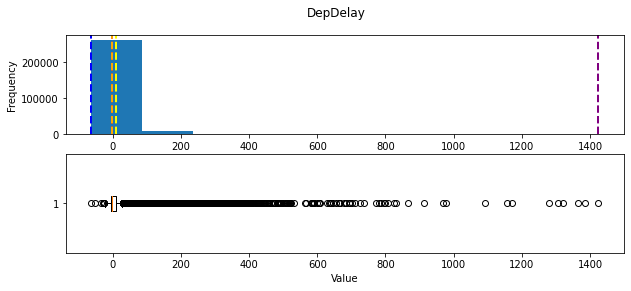

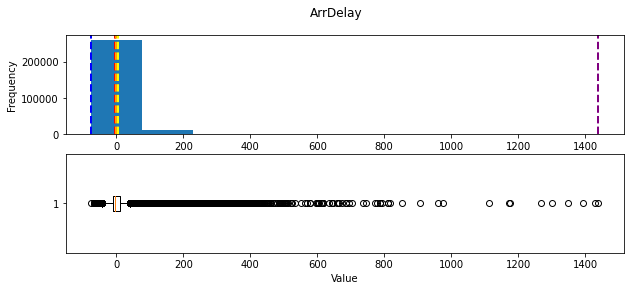

In [7]:
# Eliminate outliers in DepDelay and ArrDelay
def show(data):
    from matplotlib import pyplot as plt
    
    min_val = data.min()
    max_val = data.max() 
    mean_val = data.mean() 
    median_val = data.median()
    mode_val = data.mode()[0]
    
    fig, ax = plt.subplots(2, 1, figsize = (10, 4))
    
    ax[0].hist(data)
    ax[0].set_ylabel('Frequency')
    
    ax[0].axvline(x=min_val, color='blue', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=max_val, color='purple', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mean_val, color='yellow', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=median_val, color='red', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mode_val, color='orange', linestyle='dashed', linewidth=2)
    
    ax[1].boxplot(data, vert=False)
    ax[1].set_xlabel('Value')
    
    fig.suptitle(data.name)
    fig.show()
    
delays = ['DepDelay', 'ArrDelay']
for col in delays: 
    show(df_flights[col])

What are the average departure and arrival delays? 

How do the carriers compare in terms of arrival delay performance? 

Is there a noticeable difference in arrival delays for different days of the week? 

Which departure airport has the highest average departure delay? 

Do late departures tend to result in longer arrival delays than on-time departures? 

Which route (from origin airport to destination airport) has the most late arrivals? 

Which route has the highest average arrival delay? 

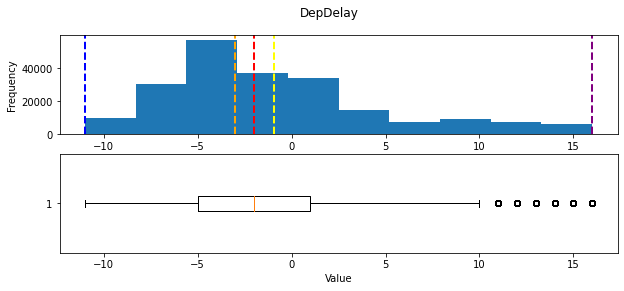

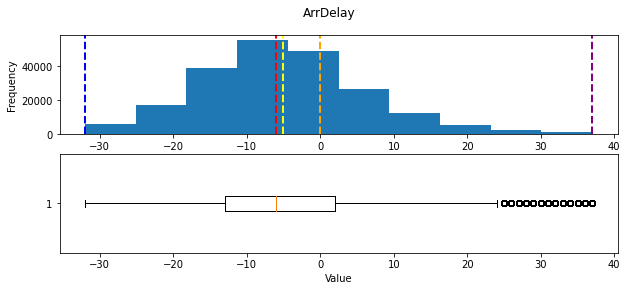

In [8]:
# Remove outliers for ArrDelay and DepDelay 

ArrDelay_01p = df_flights.ArrDelay.quantile(0.01)
ArrDelay_90p = df_flights.ArrDelay.quantile(0.9)
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01p]
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90p]

DepDelay_01p = df_flights.DepDelay.quantile(0.01)
DepDelay_90p = df_flights.DepDelay.quantile(0.9)
df_flights = df_flights[df_flights.DepDelay > DepDelay_01p]
df_flights = df_flights[df_flights.DepDelay < DepDelay_90p]

for col in delays: 
    show(df_flights[col])

In [9]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.0,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000
mean,2013.0,7.018368,15.794703,3.902737,12757.827661,12726.276147,1278.223879,-0.921692,0.018116,1461.406596,-5.030276,0.068602,0.013228
std,0.0,2.006398,8.859118,1.997744,1510.058629,1506.251757,469.440262,5.708594,0.133371,485.676457,11.424280,0.252776,0.114249
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,0.000000,1054.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,0.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,0.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,1.000000,2359.000000,37.000000,1.000000,1.000000
